## Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('Paitients_Files_Train.csv')
data_test = pd.read_csv('Paitients_Files_Test.csv')

## Exploratory Data Analysis

In [3]:
data.head()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive

In [4]:
data.shape

(599, 11)

In [5]:
data.describe()

PRG          PL          PR          SK          TS         M11  \
count  599.000000  599.000000  599.000000  599.000000  599.000000  599.000000   
mean     3.824708  120.153589   68.732888   20.562604   79.460768   31.920033   
std      3.362839   32.682364   19.335675   16.017622  116.576176    8.008227   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   64.000000    0.000000    0.000000   27.100000   
50%      3.000000  116.000000   70.000000   23.000000   36.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  123.500000   36.550000   
max     17.000000  198.000000  122.000000   99.000000  846.000000   67.100000   

              BD2         Age   Insurance  
count  599.000000  599.000000  599.000000  
mean     0.481187   33.290484    0.686144  
std      0.337552   11.828446    0.464447  
min      0.078000   21.000000    0.000000  
25%      0.248000   24.000000    0.000000  
50%      0.383000   29.000000    1.000000  
75%      0.647000   40.000000    1.000000  
max      2.420000   81.000000    1.000000

In [6]:
#Check for NULL values.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


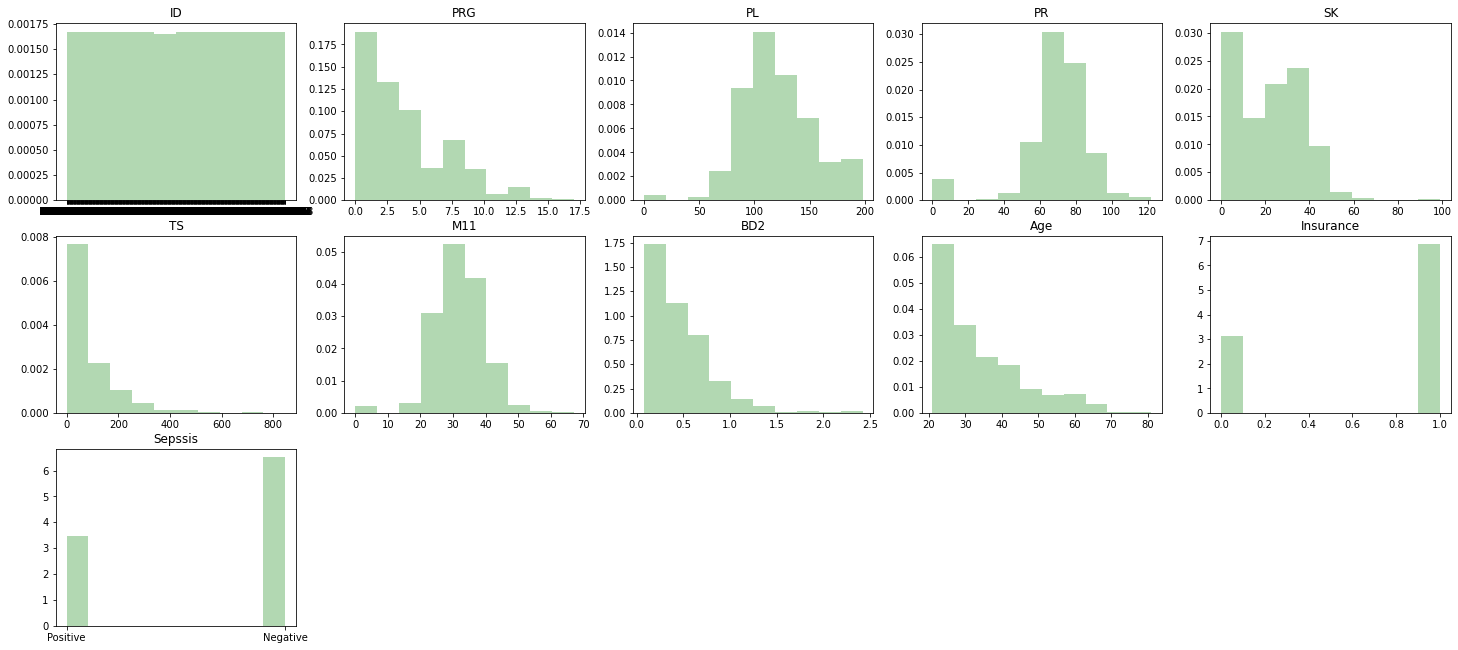

In [7]:
#Visualizing the distribution of data.
plt.figure(figsize=(25, 15))
for i, col in enumerate(data.columns):
    plt.subplot(4,5,i+1)
    plt.hist(data[col], alpha=0.3, color='g', density=True)
    plt.title(col)

In [8]:
#Class Distribution in our Target variable.

data['Sepssis'].hist(figsize=(5,5))
plt.xlabel('Sepssis')
plt.ylabel('frequency')
plt.show()

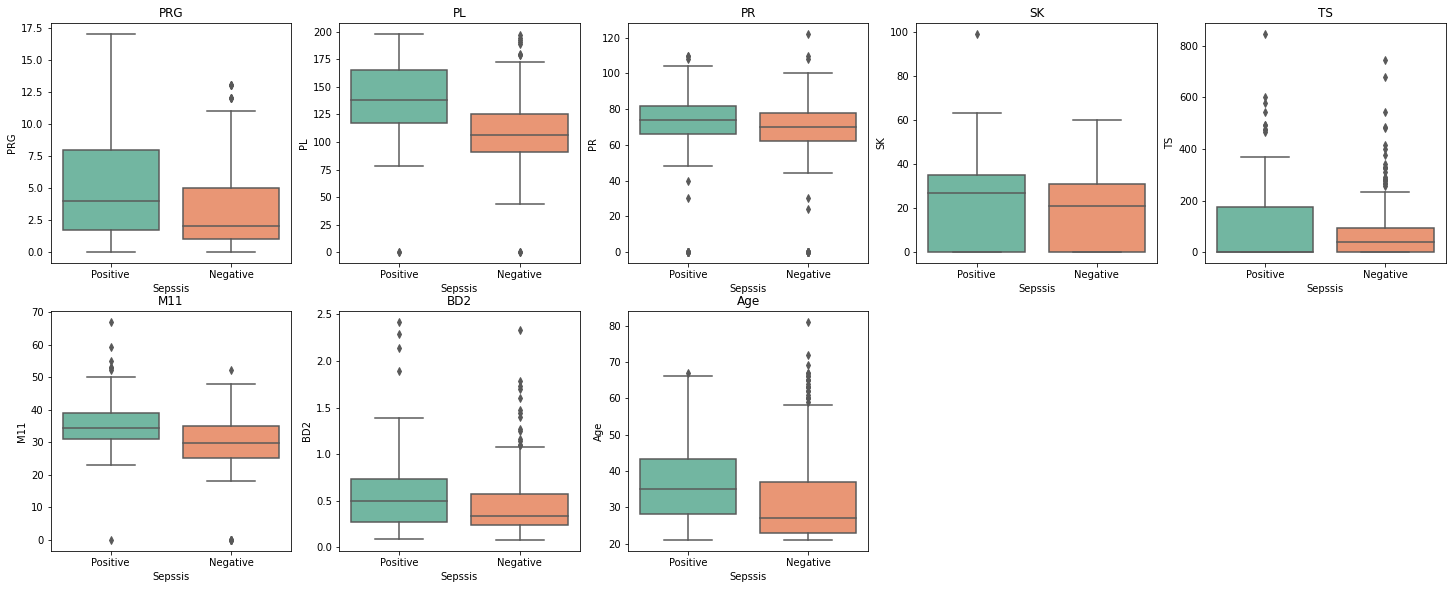

In [9]:
#Relationship between Target and other variables.

plt.figure(figsize=(25,15))
i=1
for col in data.columns:
  
    if col not in ['ID', 'Insurance', 'Sepssis']:
        
        plt.subplot(3,5,i)
        sns.boxplot(x='Sepssis',y=col,data=data, palette="Set2")
        i = i+1
        plt.title(col)

plt.show()

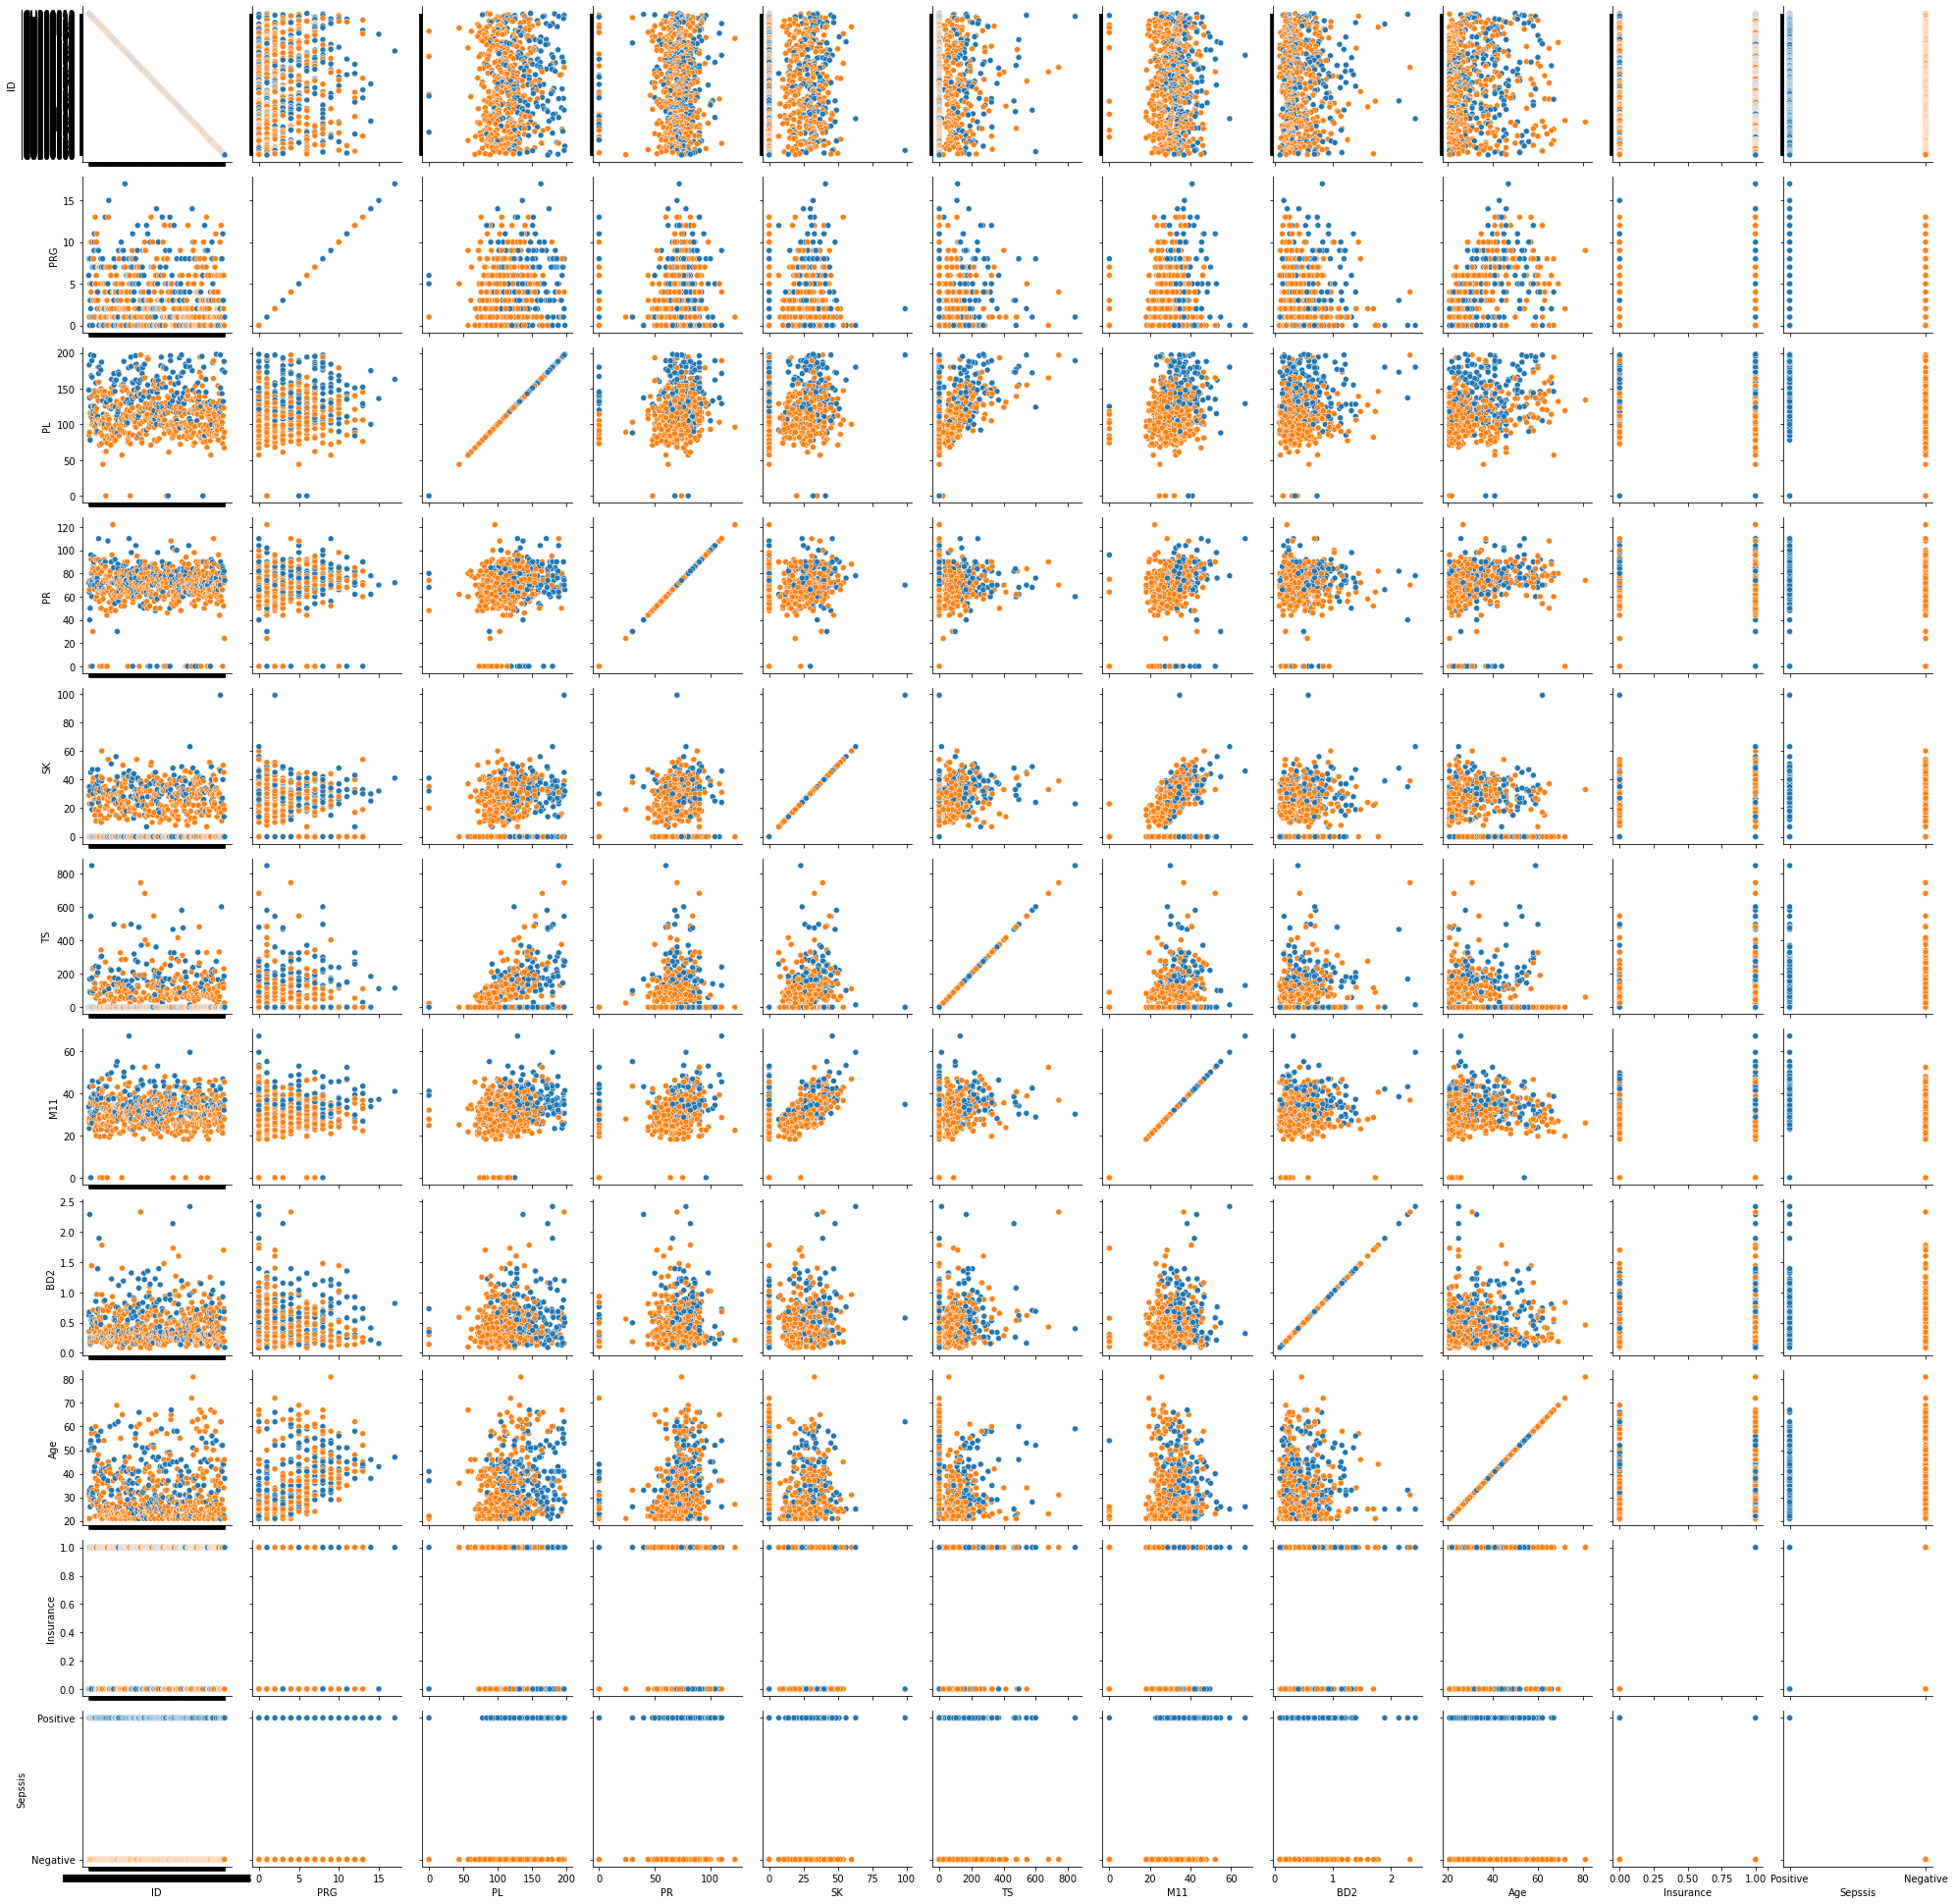

In [10]:
#All features w.r.t Sepssis
vis = sns.PairGrid(data, vars=data.columns, hue="Sepssis")
vis.map(sns.scatterplot)
plt.show()

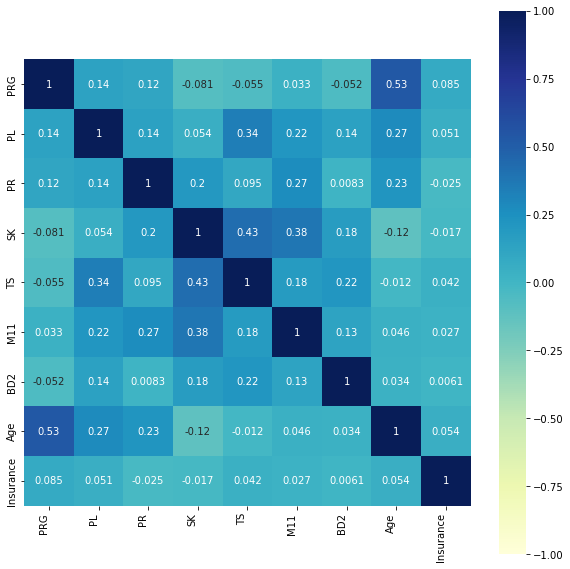

In [11]:
#Correlation Heatmap

f, ax = plt.subplots(figsize=(10, 10))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    annot=True,
    cmap='YlGnBu',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### Check for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc6fa2e970>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc6fa2ef70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc6fa2e640>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc6fa396a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc6fa39a30>],
 'means': []}

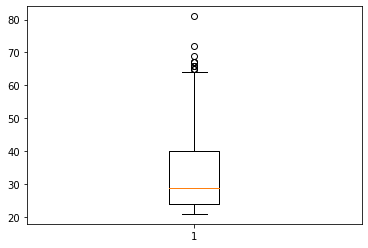

In [12]:
plt.boxplot(x=data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc6fa92af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc6fa9f250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc6fa92760>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc6fa9f910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc6fa9fbb0>],
 'means': []}

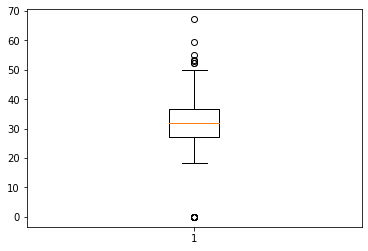

In [13]:
plt.boxplot(x=data['M11'])

In [14]:
data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

### Transforming Target Attribute

In [15]:
data['Sepssis'].value_counts()

Negative    391
Positive    208
Name: Sepssis, dtype: int64

In [16]:
data['Sepssis'] = data['Sepssis'].replace('Positive', 1)
data['Sepssis'] = data['Sepssis'].replace('Negative', 0)

In [17]:
data.head()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0        1
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0        0
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1        1
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1        0
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1        1

## Training and Modelling

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, make_scorer

In [19]:
with pd.option_context('mode.chained_assignment', None):
    train_data, val_data = train_test_split(data, test_size=0.2, shuffle=True,random_state=0)
    
print(train_data.shape[0], val_data.shape[0])

479 120


In [20]:
train_X = train_data.drop(['ID', 'Insurance', 'Sepssis'], axis=1).to_numpy()
train_y = train_data[['Sepssis']].to_numpy()
val_X = val_data.drop(['ID', 'Insurance', 'Sepssis'], axis=1).to_numpy()
val_y = val_data[['Sepssis']].to_numpy()

In [21]:
scaler = MinMaxScaler().fit(train_X)
train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [22]:
def get_f1_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    
    return train_f1, val_f1

### Logistic Regression

In [23]:
#Without Regularization.

clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000, class_weight='balanced').fit(train_X, train_y.ravel())

get_f1_scores(clf, train_X, train_y, val_X, val_y)

(0.7176123802505527, 0.76)

In [24]:
#Cross Validation

f1_scorer = make_scorer(f1_score, average='weighted')
lambda_paras = np.logspace(-10, 2, num=5)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             solver='liblinear', max_iter=1000, 
                             class_weight='balanced')
    
    scores = cross_validate(clf, train_X, train_y.ravel(), 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    
    cv_results[lambda_para] = scores

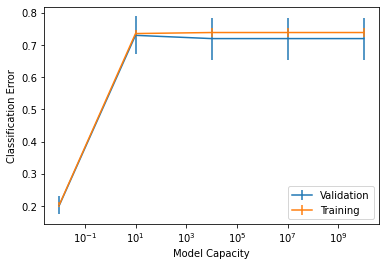

In [25]:
#Cross Validation plot

fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

val_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

In [26]:
#Grid Search to find appropriate Lambda value.
lambda_paras = np.logspace(-5, 1, num=25)

train_performace = list()
valid_performace = list()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             random_state=0, solver='liblinear', max_iter=100 , 
                             class_weight='balanced').fit(train_X, train_y.ravel())
    
    train_f1, val_f1 = get_f1_scores(clf, train_X, train_y, val_X, val_y)
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)

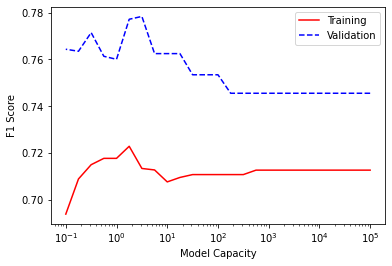

In [27]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

In [28]:
#Regularization

clf_l2 = LogisticRegression(penalty='l2', C = 1, random_state=0, solver='liblinear', max_iter=1000, class_weight='balanced').fit(train_X, train_y.ravel())

get_f1_scores(clf_l2, train_X, train_y, val_X, val_y)


(0.7176123802505527, 0.76)

### Random Forest

In [29]:
from sklearn.metrics import balanced_accuracy_score

def get_acc_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_acc = balanced_accuracy_score(train_y, train_pred)
    val_acc = balanced_accuracy_score(val_y, val_pred)
    
    return train_acc, val_acc

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, n_estimators=500, class_weight='balanced_subsample', random_state=0)
clf.fit(train_X, train_y.ravel())

RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       n_estimators=500, random_state=0)

In [31]:
train_acc, val_acc = get_acc_scores(clf, train_X, train_y, val_X, val_y)
print("Train Accuracy score: {:.3f}".format(train_acc))
print("Validation Accuracy score: {:.3f}".format(val_acc))

Train Accuracy score: 0.972
Validation Accuracy score: 0.709


## Predictions

In [32]:
data_test.head()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0

In [33]:
test_X = data_test.drop(['ID', 'Insurance'], axis=1).to_numpy()

In [34]:
scaler = MinMaxScaler().fit(test_X)
test_X = scaler.transform(test_X)

In [35]:
pred = clf_l2.predict(test_X)

In [36]:
pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [37]:
fin = data_test.copy()
fin.head()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0

In [38]:
fin['Sepssis']=pred

In [39]:
fin.head()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  Sepssis
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1        0
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1        0
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1        0
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1        0
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0        1

In [40]:
fin.drop(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], axis=1, inplace=True)

In [41]:
fin.to_csv('s3887231_predictions.csv', index=False)

# Final Judgement

A careful and thorough study was conducted, it was observed through EDA that the dataset was skewed and unbalanced. To overcome this shortcoming, The dataset was scaled using minmax scaler and to overcome the shortcoming of an unbalanced target variable during training the "class-weight" parameter was set to "balanced". After which it is evident that in this paricular experiment the Logistic regression model after regularization performs the best off the 3 models. While the Random forest model gave high accuracy on the train data the validation set accuracy was significantly lower indicating the presence of high variance.
The baseline logistic regression model seems to perform well, but after minute parameter tuning and regularization(selecting appropriate Lambda values) it is much more accurate and significantly better and is ready to be used to make predictions.